In [105]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import geopandas as gpd
#from shapely.geometry import Point, Polygon, box
#import fiona
#import pyproj
#import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.ticker as ticker


#%matplotlib widget
%matplotlib inline

In [106]:
!pip3 install openpyxl

# This notebook will combine the data logs collected from different instruments at UW

In [107]:
!pwd

/Users/amandaworthy/CS4EVN/Data


In [108]:
!ls

Data_Organization_Instruments.ipynb QUESTTEMP_Reports
Gas_Lab_Reports


In [109]:
#code to grab specific gaslab report

one= pd.read_csv("Gas_Lab_Reports/Allen 605/January-24-2023_Allen.csv", sep=',', header=[1])
one.head()

list(one.columns)

['Unnamed: 0', 'CO2', 'Temperature', 'Humidity', 'Unnamed: 4']

## Read in all files from gaslab

In [110]:
import os
import pandas as pd
import glob
import openpyxl
path_co2 = os.path.abspath('Gas_Lab_Reports/Allen 605') 
files_co2 = os.listdir(path_co2) 
file_list_co2 = glob.glob(path_co2 + "/*.csv")
file_list_co2

['/Users/amandaworthy/CS4EVN/Data/Gas_Lab_Reports/Allen 605/January-24-2023_Allen.csv']

In [111]:
df = pd.DataFrame()
for file in file_list_co2:
    temp_df = pd.read_csv(file, header=[1])
    df = pd.concat([df, temp_df], axis=0)


#remove columns w only na
df= df.dropna(axis=1, how='all')

#rename columns
df= df.rename(columns= {"Unnamed: 0": "Timestamp", 'CO2': "CO2_gas_lab", 'Temperature': "Temperature_gas_lab", 'Humidity': "Humidity_gas_lab"})

#make datetime column a datetime :) 
df


df['Timestamp'] =  pd.to_datetime(df['Timestamp'])
df["Timestamp"] = df["Timestamp"].dt.round("min")
df

Timestamp  CO2_gas_lab  Temperature_gas_lab  Humidity_gas_lab
0    2023-01-24 14:13:00            0                24.05             32.57
1    2023-01-24 14:14:00          593                24.20             32.06
2    2023-01-24 14:15:00          590                24.32             31.96
3    2023-01-24 14:16:00          597                24.39             31.79
4    2023-01-24 14:17:00          594                24.46             31.48
...                  ...          ...                  ...               ...
6654 2023-01-30 10:08:00          504                24.30             16.70
6655 2023-01-30 10:10:00          501                24.31             16.66
6656 2023-01-30 10:12:00          552                24.30             16.94
6657 2023-01-30 10:14:00          559                24.30             16.80
6658 2023-01-30 10:16:00          521                24.31             16.80

[6659 rows x 4 columns]

In [112]:
#leave blank

## Read in all files from Questtemp

In [113]:
!pwd

/Users/amandaworthy/CS4EVN/Data


In [114]:
#code to grab specific gaslab report

two= pd.read_csv("QUESTTEMP_Reports/Allen 605/1_20_2023_Allen_2.csv", header=[0])


list(two.columns)

['Timestamp',
 'DryBulb',
 'Globe',
 'HeatIndex',
 'Humidity',
 'WBGTIn',
 'WBGTOut',
 'WetBulb']

In [115]:
two.head()

#two.drop(two.tail(1851-1806).index,inplace=True)
two['Timestamp'] =  pd.to_datetime(two['Timestamp'])

two.head()

Timestamp  DryBulb  Globe  HeatIndex  Humidity  WBGTIn  WBGTOut  \
0 2023-01-18 17:21:00     23.0   23.8       21.9      32.5    17.1     17.0   
1 2023-01-18 17:23:00     23.2   23.8       22.0      31.8    17.1     17.0   
2 2023-01-18 17:25:00     23.3   23.7       22.0      31.6    17.1     17.0   
3 2023-01-18 17:27:00     23.3   23.6       22.0      31.2    17.0     17.0   
4 2023-01-18 17:29:00     23.4   23.6       22.0      31.0    17.0     17.0   

   WetBulb  
0     14.2  
1     14.2  
2     14.2  
3     14.2  
4     14.2

In [116]:
import os
import pandas as pd
import glob
import openpyxl
path_temp = os.path.abspath('QUESTTEMP_Reports/Allen 605/') 
files_temp = os.listdir(path_temp) 
file_list_temp = glob.glob(path_temp + "/*.csv")
file_list_temp

['/Users/amandaworthy/CS4EVN/Data/QUESTTEMP_Reports/Allen 605/1_20_2023_Allen_2.csv']

In [117]:
#only have one df right now so haven't figured out full syntex 

df_temp = pd.DataFrame()
for file in file_list_temp:
    print(file)
    df2 = pd.read_csv(file, header=[0])
    df_temp = pd.concat([df_temp, df2], axis=0)


#remove columns w only na
df_temp= df_temp.dropna(axis=1, how='all')

#rename columns
#df= df.rename(columns= {"Unnamed: 0": "Date_Time", 'CO2': "CO2_gas_lab", 'Temperature': "Temperature_gas_lab", 'Humidity': "Humidity_gas_lab"})

#make datetime column a datetime :) 

df_temp['Timestamp'] =  pd.to_datetime(df_temp['Timestamp'])
df_temp

/Users/amandaworthy/CS4EVN/Data/QUESTTEMP_Reports/Allen 605/1_20_2023_Allen_2.csv


Timestamp  DryBulb  Globe  HeatIndex  Humidity  WBGTIn  \
0    2023-01-18 17:21:00     23.0   23.8       21.9      32.5    17.1   
1    2023-01-18 17:23:00     23.2   23.8       22.0      31.8    17.1   
2    2023-01-18 17:25:00     23.3   23.7       22.0      31.6    17.1   
3    2023-01-18 17:27:00     23.3   23.6       22.0      31.2    17.0   
4    2023-01-18 17:29:00     23.4   23.6       22.0      31.0    17.0   
...                  ...      ...    ...        ...       ...     ...   
8428 2023-01-30 10:17:00     23.7   23.6        NaN      12.6    15.0   
8429 2023-01-30 10:19:00     23.7   23.7        NaN      12.6    15.1   
8430 2023-01-30 10:21:00     23.7   23.8        NaN      12.6    15.1   
8431 2023-01-30 10:23:00     23.8   23.8        NaN      12.4    15.1   
8432 2023-01-30 10:25:00     23.8   23.8        NaN      12.4    15.1   

      WBGTOut  WetBulb  
0        17.0     14.2  
1        17.0     14.2  
2        17.0     14.2  
3        17.0     14.2  
4        17.0     14.2  
...       ...      ...  
8428     15.0     11.4  
8429     15.1     11.4  
8430     15.1     11.4  
8431     15.1     11.4  
8432     15.1     11.4  

[8433 rows x 8 columns]

## Merge the two df together from CO2 sensor and Tempoquest
#### Merge by timestamp

In [118]:
print(df_temp.shape)
df_temp.head()

(8433, 8)


Timestamp  DryBulb  Globe  HeatIndex  Humidity  WBGTIn  WBGTOut  \
0 2023-01-18 17:21:00     23.0   23.8       21.9      32.5    17.1     17.0   
1 2023-01-18 17:23:00     23.2   23.8       22.0      31.8    17.1     17.0   
2 2023-01-18 17:25:00     23.3   23.7       22.0      31.6    17.1     17.0   
3 2023-01-18 17:27:00     23.3   23.6       22.0      31.2    17.0     17.0   
4 2023-01-18 17:29:00     23.4   23.6       22.0      31.0    17.0     17.0   

   WetBulb  
0     14.2  
1     14.2  
2     14.2  
3     14.2  
4     14.2

In [119]:
print(df.shape)
df.head()


(6659, 4)


Timestamp  CO2_gas_lab  Temperature_gas_lab  Humidity_gas_lab
0 2023-01-24 14:13:00            0                24.05             32.57
1 2023-01-24 14:14:00          593                24.20             32.06
2 2023-01-24 14:15:00          590                24.32             31.96
3 2023-01-24 14:16:00          597                24.39             31.79
4 2023-01-24 14:17:00          594                24.46             31.48

In [120]:
df_temp_co2= pd.merge( df_temp, df, on ='Timestamp', how= 'inner')
df_temp_co2.head()

Timestamp  DryBulb  Globe  HeatIndex  Humidity  WBGTIn  WBGTOut  \
0 2023-01-24 14:13:00     24.0   23.9        NaN      27.5    17.0     17.0   
1 2023-01-24 14:15:00     24.0   24.0        NaN      27.6    17.1     17.1   
2 2023-01-24 14:17:00     24.0   24.0        NaN      27.6    17.1     17.1   
3 2023-01-24 14:19:00     24.0   24.0        NaN      27.5    17.1     17.1   
4 2023-01-24 14:21:00     24.0   24.0        NaN      27.4    17.1     17.1   

   WetBulb  CO2_gas_lab  Temperature_gas_lab  Humidity_gas_lab  
0     14.1            0                24.05             32.57  
1     14.1          590                24.32             31.96  
2     14.1          594                24.46             31.48  
3     14.1          607                24.55             31.35  
4     14.1          610                24.61             31.15

In [121]:
df_temp_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 0 to 3329
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            3330 non-null   datetime64[ns]
 1   DryBulb              3330 non-null   float64       
 2   Globe                3330 non-null   float64       
 3   HeatIndex            787 non-null    float64       
 4   Humidity             3330 non-null   float64       
 5   WBGTIn               3330 non-null   float64       
 6   WBGTOut              3330 non-null   float64       
 7   WetBulb              3330 non-null   float64       
 8   CO2_gas_lab          3330 non-null   int64         
 9   Temperature_gas_lab  3330 non-null   float64       
 10  Humidity_gas_lab     3330 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 312.2 KB


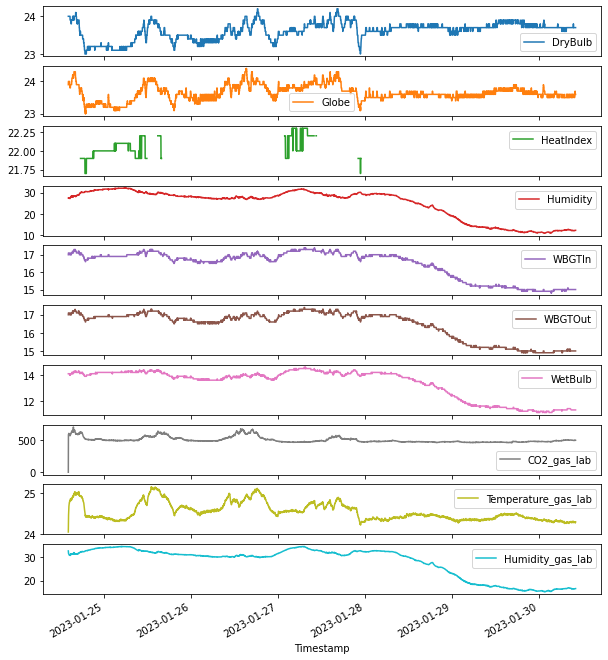

In [127]:
df_temp_co2= df_temp_co2.set_index('Timestamp')
df_temp_co2.plot(subplots=True, figsize=(10,12));

In [149]:
list(df_temp_co2.columns)

temp_columns= ['DryBulb',
 'Globe',
 'WBGTIn',
 'WBGTOut',
 'WetBulb',
 'Temperature_gas_lab']


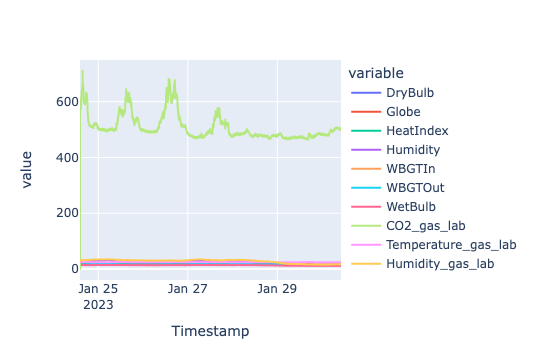

In [158]:
import plotly.express as px

px.line(df_temp_co2, x = df_temp_co2.index, y = df_temp_co2.columns)

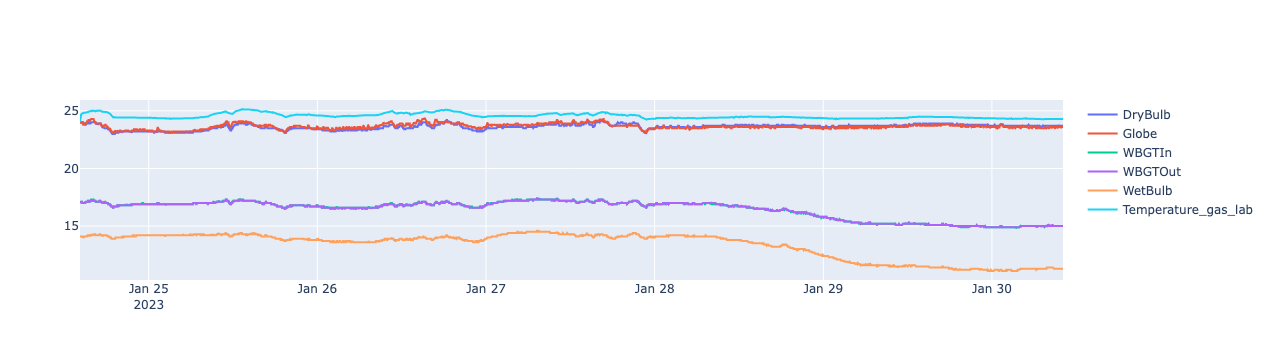

In [167]:
import plotly.graph_objs as go
fig = go.Figure([{
    'x': df_temp_co2.index,
    'y': df_temp_co2[col],
    'name': col
}  for col in temp_columns])
fig.show()